In [1]:
import os
import glob
import pandas as pd
import seaborn as sns

In [3]:
task_dir = '/Volumes/research$/redcay/DSCN Lab/Experiments/SCONN/task_socialreward/'
data_dir = task_dir+'data/'
rdcp_dir = task_dir+'stimuli/Redcap/wide_answers/'

os.chdir(data_dir)

In [4]:
subj_list = [x for x in os.walk(data_dir)][0][1]
subj_list.remove('SCN_00T')
subj = subj_list[0]

print('Found '+str(len(subj_list))+' participants')

Found 102 participants


In [12]:
redcap_data[redcap_data['record_id'].str.lower.startswith('SCN')]

AttributeError: 'function' object has no attribute 'startswith'

In [28]:
redcap_orig = pd.read_csv(rdcp_dir+'SCONNChildPacket-SocialRewardFMRIQues_DATA_2024-02-16_1231.csv')

# Make a copy of the original data
redcap_data = redcap_orig.copy()

# Make all IDs lowercase (for consistency)
redcap_data['record_id'] = redcap_data['record_id'].str.lower()

redcap_data = redcap_data[redcap_data['record_id'].str.startswith('scn')]

# Make the record id the index
redcap_data = redcap_data.set_index('record_id')

redcap_data

,redcap_event_name,socrew1,socrew2,socrew3,socrew4,socrew5,socrew6,socrew7,socrew8,socrew9,...,socrew210,socrew211,open1___1,open1___2,open1___3,open1___4,open1___5,open2,open3,social_reward_fmri_complete
record_id,,,,,,,,,,,,,,,,,,,,,
scn_101,time_1_arm_1,4.0,2.0,1.0,4.0,5.0,5.0,4.0,4.0,4.0,...,2.0,5.0,1,0,1,0,1,our sense of humor,different kind of people. eg: the super kind o...,2
scn_102,time_1_arm_1,5.0,4.0,2.0,2.0,5.0,4.0,4.0,2.0,2.0,...,2.0,5.0,1,0,1,1,1,Mutual friends and classes.,Trust and honesty.,2
scn_103,time_1_arm_1,5.0,4.0,2.0,4.0,5.0,2.0,2.0,2.0,4.0,...,2.0,5.0,1,0,1,0,1,"I like to have classes with my friends, so be ...",I think getting along well and working well wi...,2
scn_104,time_1_arm_1,5.0,1.0,2.0,4.0,1.0,4.0,1.0,2.0,1.0,...,2.0,5.0,1,0,1,1,0,Time available to spend together,Common interests,2
scn_105,time_1_arm_1,2.0,2.0,4.0,2.0,5.0,4.0,5.0,2.0,1.0,...,1.0,1.0,1,1,1,1,1,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scn_246,time_1_arm_1,5.0,2.0,2.0,1.0,4.0,2.0,2.0,2.0,2.0,...,4.0,5.0,0,1,1,0,1,"Religon, Classes.",Don't be too mean to each other,2
scn_249,time_1_arm_1,5.0,2.0,2.0,2.0,NaN,4.0,2.0,2.0,2.0,...,2.0,4.0,1,0,0,0,1,thats all,Someone who you can talk to after school and n...,2
scn_250,time_1_arm_1,4.0,4.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,...,2.0,5.0,0,0,1,1,1,I like having similar personalitys and being a...,"Trust/Honesty, being able to trust what the ot...",2


In [29]:
# Drop irrelevant columns
relv_cols = [x for x in redcap_data.columns if x.startswith('socrew')]

redcap_data = redcap_data[relv_cols]

# Drop missing data
redcap_data = redcap_data.dropna()
redcap_data

,socrew1,socrew2,socrew3,socrew4,socrew5,socrew6,socrew7,socrew8,socrew9,socrew10,...,socrew202,socrew203,socrew204,socrew205,socrew206,socrew207,socrew208,socrew209,socrew210,socrew211
record_id,,,,,,,,,,,,,,,,,,,,,
scn_101,4.0,2.0,1.0,4.0,5.0,5.0,4.0,4.0,4.0,2.0,...,1.0,4.0,2.0,4.0,5.0,1.0,2.0,2.0,2.0,5.0
scn_103,5.0,4.0,2.0,4.0,5.0,2.0,2.0,2.0,4.0,5.0,...,2.0,4.0,4.0,5.0,4.0,1.0,4.0,5.0,2.0,5.0
scn_104,5.0,1.0,2.0,4.0,1.0,4.0,1.0,2.0,1.0,4.0,...,2.0,4.0,1.0,2.0,1.0,1.0,4.0,5.0,2.0,5.0
scn_105,2.0,2.0,4.0,2.0,5.0,4.0,5.0,2.0,1.0,4.0,...,1.0,4.0,1.0,1.0,1.0,1.0,5.0,5.0,1.0,1.0
scn_106,2.0,2.0,2.0,1.0,2.0,4.0,4.0,2.0,2.0,1.0,...,5.0,4.0,1.0,5.0,4.0,1.0,1.0,5.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scn_241,5.0,4.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,5.0,...,5.0,4.0,1.0,5.0,4.0,1.0,4.0,5.0,2.0,5.0
scn_242,5.0,1.0,2.0,2.0,5.0,5.0,4.0,2.0,2.0,5.0,...,1.0,4.0,1.0,1.0,5.0,1.0,5.0,5.0,2.0,5.0
scn_243,4.0,2.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,1.0,...,4.0,4.0,2.0,4.0,4.0,1.0,2.0,2.0,1.0,4.0


<Axes: xlabel='record_id', ylabel='record_id'>

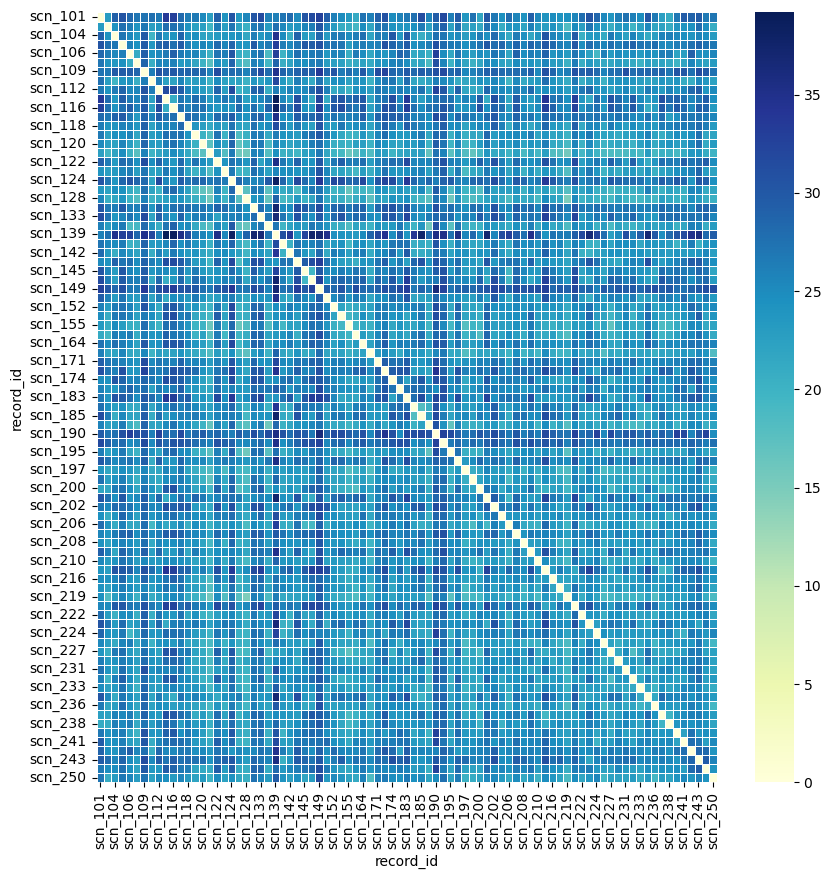

In [30]:
from scipy.spatial.distance import euclidean, pdist, squareform
import matplotlib.pyplot as plt

# Create similarity matrix
dists = pdist(redcap_data)
similarity_matrix = pd.DataFrame(squareform(dists), 
                                 columns=redcap_data.index, index=redcap_data.index)


fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(similarity_matrix, cmap='YlGnBu', linewidths=.5, ax=ax)

In [38]:
similarity_matrix.loc['scn_113'].sum()

2245.627846680812

In [39]:
similarity_matrix.loc['scn_146'].sum()

2205.966878815431

In [40]:
similarity_matrix.loc['scn_155'].sum()

1883.7816126472967

In [44]:
sim_sum.sort_values(ascending=False).head(10)

record_id
scn_139    2542.812718
scn_149    2505.204013
scn_190    2468.583792
scn_109    2408.598261
scn_191    2363.710113
scn_124    2362.840960
scn_129    2300.734723
scn_105    2284.686898
scn_116    2280.362339
scn_221    2279.211201
dtype: float64

<Axes: ylabel='Count'>

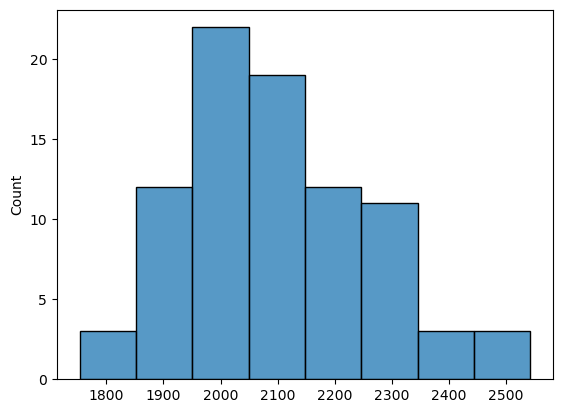

In [45]:
sns.histplot(sim_sum)